<a href="https://colab.research.google.com/github/ahaque12/fiddler-scenic-route/blob/main/Fiddler_can_you_take_the_scenic_route.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fiddler on the proof Can you take the scenic route?

https://thefiddler.substack.com/p/can-you-take-the-scenic-route

##This Week’s Fiddler

From Sanandan Swaminathan comes a logic puzzle about a picturesque drive, and getting by with a little help from your friends:

There is a circular road, along which travelers can drive in either direction. However, there is only one gas station on the loop. Driving the full loop in your car requires 40 gallons of gas, but your car’s fuel tank has a maximum capacity of 20 gallons. That said, you’d love to see every last spot along the route.

Of course, you can’t achieve this with just your own car. Fortunately, you can call on any number of your Fiddler Nation friends, all of whom happen to have the same make and model car as you, each with a 20-gallon fuel tank and identical fuel efficiency.

Now, all the cars, including yours, must start and end at the gas station. However, only your car must cover the entire route. The gas station can be visited (and refueled at) by any car, any number of times. Cars may also transfer fuel from one to another, provided they meet up together at a spot along the route.

What is the smallest number of cars (including yours) needed for you to see every spot on the circular route?

(Note: There’s no “cheating” here. No towing or pushing of cars. Every car must be driven on its own, and by one person. No jerrycans for lugging around extra fuel, and so on and so forth.)

## Extra Credit
Assuming you’ve used the smallest number of cars to complete your tour of the entire circular road, Sanandan offers the following as Extra Credit:

What is the minimum amount of gas collectively needed by all cars for this journey? (Remember, all the cars must begin and end at the gas station.)



# Solution

With only your car, it is impossible to traverse the full loop. You can rely on other cars to refuel your car on the way, however other cars must have enough gas to return back to the gas station.

With one *other* car, if the car can refill infinite number of times it can travel with you to $10 - \epsilon$, top you up to 20 gallons $2*\epsilon$ at a time and wait for you to return to top you back up, allowing you to travel $20-\epsilon$ and return. You can then start the other direction from the gas station and traverse the full loop.

# Assume each car cannot refill

You can think of $f(n)$ as the incremental distance the car can go with $n$ other cars resupplying along the way. E.g., $f(0)$ is $0$. $f(1)$ is $6.\overline{6}$. This is because one *other* car must travel a distance $d$, refuel that same distance to your car, and then go back to the station. The maximum fuel they can provide is therefore $6.\overline{6}$. A second *other* car must provide fuel to top off the second car who then provides fuel to your car. For additional cars, 20 miles must be equal to the distance the prior other car traveled + twice the incremental additional distance the latest other car travels + the fueling amount. The fueling amount to top off is equal to the distance the latest other car has traveled. I.e. $20 = f(n-1) + 2*(f(n)-f(n-1))+f(n)$. This then creates the following recurrence relationship:

$
f(n) = \frac{20 + f(n-1)}{3} \\
f(1) = \frac{20}{3} \\
f(0) = 0
$

The solution to this recurrence relationship is:

$
f(n) = 10(1 - 3^{-n})
$

The additional distance you need is ten miles. This allows you to go half the route, then go back to the gas station and do the same thing the other way.

## Other thoughts
This can be generalized to $g(n, a)$ which is the farthest distance the $n$ other cars can go to provide $a$ amount of fuel to you.

$
g(n, a) = \frac{20 + f(n-1) - a}{2} \\
g(1) = \frac{20 - a}{2} \\
g(0) = 0
$


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def other_travel_recurrence(n):
  """ Maximize incremental distance other cars can allow you to travel.
      Recurrence relationship.
  """
  if n == 1:
    return 20/3
  elif n == 0:
    return 0

  return (20 + other_travel_recurrence(n-1))/3

def other_travel_closed(n):
  """ Maximize incremental distance other cars can allow you to travel.
      Closed-form solution.
  """
  if n == 1:
    return 20/3
  elif n == 0:
    return 0

  return 10*(1-(3**(-n)))

def other_travel_recurrence_a(n, a):
  """ Maximize incremental distance other cars can allow you to travel to
      to deliver amount a.
      Recurrence relationship.
  """
  if n == 1:
    return (20 - a)/2
  elif n == 0:
    return 0

  return (20 + other_travel_recurrence(n-1) - a)/2


In [ ]:
# Ensure closed form solution is correct.
assert(other_travel_closed(1) == (20/3))
assert(other_travel_recurrence(1) == other_travel_closed(1))
assert(other_travel_recurrence(2) == other_travel_closed(2))
assert(other_travel_recurrence(5) == other_travel_closed(5))
assert(other_travel_recurrence(5) == other_travel_recurrence_a(5, other_travel_recurrence(5)))

AssertionError: 

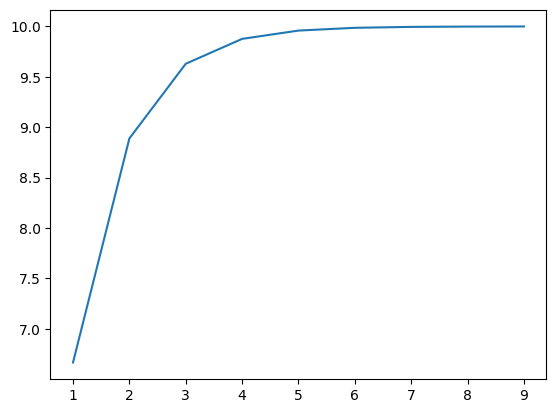

In [ ]:
travel_amounts = np.array([other_travel_closed(i) for i in range(1, 10)])
plt.plot(range(1, len(travel_amounts)+1), travel_amounts)

In [ ]:
other_travel_recurrence_a(1, 10)

5.0

(9.958847736625515, 9.727366255144032)